In [2]:
import matplotlib.pyplot as plt 
import scipy.misc
import numpy as np
from keras.layers import Dense, Dropout, Flatten, Input, Conv2D, Cropping2D
from keras.layers import MaxPooling2D, ZeroPadding2D, BatchNormalization, Activation
from keras.models import Model
from keras.utils.layer_utils import print_summary
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K

from keras import __version__ as kv
from scipy import __version__ as sv
from matplotlib import __version__ as mv
from numpy import __version__ as nv

print kv
print sv
print mv
print nv

Using TensorFlow backend.


2.0.5
0.19.1
2.0.0
1.13.0


In [3]:
# Local files
import utils
reload(utils)

<module 'utils' from 'utils.pyc'>

# Data

### Config

In [4]:
trained_model_dir = '/home/ubuntu/data/sar/experiment_crops_20170815/trained_models/1.1-mph_as_kd-baseline-simple_CNN_from_scratch/'

In [5]:
train_dir = '/home/ubuntu/data/sar/experiment_crops_20170815/train/50x50/'
valid_dir = '/home/ubuntu/data/sar/experiment_crops_20170815/validate/50x50/'

In [6]:
input_shape = (50, 50, 1)
num_classes = 3

### Convert tif2png

Done in 1.0-mph_as_kd-baseline-simple_CNN_from_scratch.ipynb

### Create Generators

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(50, 50),
        batch_size=20,
        class_mode='categorical', 
        color_mode='grayscale')

validation_generator = test_datagen.flow_from_directory(
        valid_dir, 
        target_size=(50, 50),
        shuffle=False,
        batch_size=10,
        class_mode='categorical',
        color_mode='grayscale')

Found 2000 images belonging to 3 classes.
Found 500 images belonging to 3 classes.


# Experiments

## simple/baseline model (3 layers, no regularisation)

In [7]:
classifier_input = Input(shape=input_shape)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(classifier_input)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Flatten()(x)
x = Dense(num_classes, activation='softmax')(x)

model = Model(outputs=x, inputs=classifier_input)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50, 50, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
__________

In [9]:
lr = 0.001
K.set_value(model.optimizer.lr, lr)

In [10]:
model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=60)

Epoch 1/10
100/100 [==============================] - 10s - loss: 0.5597 - acc: 0.7605 - val_loss: 0.4045 - val_acc: 0.8633
Epoch 2/10
100/100 [==============================] - 10s - loss: 0.3568 - acc: 0.8540 - val_loss: 0.4699 - val_acc: 0.8267
Epoch 3/10
100/100 [==============================] - 10s - loss: 0.2751 - acc: 0.8930 - val_loss: 0.3152 - val_acc: 0.8800
Epoch 4/10
100/100 [==============================] - 10s - loss: 0.2233 - acc: 0.9195 - val_loss: 0.3283 - val_acc: 0.8783
Epoch 5/10
100/100 [==============================] - 10s - loss: 0.1860 - acc: 0.9300 - val_loss: 0.2767 - val_acc: 0.9267
Epoch 6/10
100/100 [==============================] - 10s - loss: 0.1645 - acc: 0.9410 - val_loss: 0.3258 - val_acc: 0.9033
Epoch 7/10
100/100 [==============================] - 10s - loss: 0.1418 - acc: 0.9455 - val_loss: 0.2645 - val_acc: 0.9100
Epoch 8/10
100/100 [==============================] - 10s - loss: 0.1297 - acc: 0.9570 - val_loss: 0.2203 - val_acc: 0.9350
Epoch 9/

In [11]:
lr = 0.001
K.set_value(model.optimizer.lr, lr)
model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=2,
        validation_data=validation_generator,
        validation_steps=60)

Epoch 1/2
100/100 [==============================] - 10s - loss: 0.0862 - acc: 0.9680 - val_loss: 0.2873 - val_acc: 0.9217
Epoch 2/2
100/100 [==============================] - 10s - loss: 0.0824 - acc: 0.9680 - val_loss: 0.5210 - val_acc: 0.8817


In [12]:
lr = 0.001
K.set_value(model.optimizer.lr, lr)
model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=2,
        validation_data=validation_generator,
        validation_steps=60)

Epoch 1/2
100/100 [==============================] - 10s - loss: 0.0845 - acc: 0.9680 - val_loss: 0.3127 - val_acc: 0.9283
Epoch 2/2
100/100 [==============================] - 10s - loss: 0.0654 - acc: 0.9780 - val_loss: 0.4227 - val_acc: 0.9183


In [13]:
lr = 0.0001
K.set_value(model.optimizer.lr, lr)
model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=2,
        validation_data=validation_generator,
        validation_steps=60)

Epoch 1/2
100/100 [==============================] - 10s - loss: 0.0318 - acc: 0.9870 - val_loss: 0.3282 - val_acc: 0.9267
Epoch 2/2
100/100 [==============================] - 10s - loss: 0.0275 - acc: 0.9940 - val_loss: 0.3217 - val_acc: 0.9283


In [14]:
lr = 0.0001
K.set_value(model.optimizer.lr, lr)
model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=2,
        validation_data=validation_generator,
        validation_steps=60)

Epoch 1/2
100/100 [==============================] - 10s - loss: 0.0172 - acc: 0.9960 - val_loss: 0.3562 - val_acc: 0.9317
Epoch 2/2
100/100 [==============================] - 10s - loss: 0.0271 - acc: 0.9945 - val_loss: 0.3130 - val_acc: 0.9367


In [325]:
lr = 0.0001
K.set_value(model.optimizer.lr, lr)
model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=2,
        validation_data=validation_generator,
        validation_steps=60)

Epoch 1/2
100/100 [==============================] - 10s - loss: 0.0171 - acc: 0.9955 - val_loss: 0.3375 - val_acc: 0.9350
Epoch 2/2
100/100 [==============================] - 10s - loss: 0.0215 - acc: 0.9960 - val_loss: 0.3713 - val_acc: 0.9200


In [15]:
model.save_weights(trained_model_dir + "simple_model_valAcc94.h5")

### Lets visualise and evaluate/plot predictions

In [16]:
validation_generator.reset()

In [17]:
preds = model.predict_generator(validation_generator,50)
preds.shape

(500, 3)

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
sorted(list(validation_generator.class_indices))

['oil_and_gas_infrastructure', 'other', 'turbine']

In [20]:
y_pred = np.argmax(preds, axis=1)

In [21]:
y_true = validation_generator.classes
labels = [0,1,2] # sorted(list(validation_generator.class_indices))
y_pred = np.argmax(preds, axis=1)
cm = confusion_matrix(y_true, y_pred, labels)
print(cm)

[[117   5   3]
 [ 14 105   6]
 [  2   7 241]]


Confusion matrix, without normalization
[[117   5   3]
 [ 14 105   6]
 [  2   7 241]]


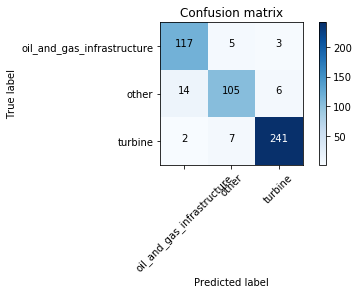

In [22]:
utils.plot_confusion_matrix(cm, sorted(list(validation_generator.class_indices)))

In [323]:
# Number false positives = sum vertical (non-diagonal) rows =
print "Number 'oil_and_gas_infrastructure' false positives = {}".format(sum(cm[1:,0]))
print "Number 'turbine' false positives = {}".format(sum(cm[:2,2]))

print "\n"

# Number false negatives = sum horizontal (non-diagonal) rows =
print "Number 'oil_and_gas_infrastructure' false negatives = {}".format(sum(cm[0, 1:]))
print "Number 'turbine' false negatives = {}".format(sum(cm[2, :2]))

Number 'oil_and_gas_infrastructure' false positives = 16
Number 'turbine' false positives = 9


Number 'oil_and_gas_infrastructure' false negatives = 8
Number 'turbine' false negatives = 9


In [165]:
# reduce filenames for kari_plot
short_validation_filenames = [name[-35:] for name in validation_generator.filenames]

In [166]:
utils.kari_plot(preds, short_validation_filenames)

We see good predictions on the whole:

 - Some actual `oil_and_gas_infrastructure` is being predicted as `other` (i.e. false negatives).
 - Some actual `turbine` is being predicted as `other` (i.e. false negatives).
 - Many `other` is being predicted as `turbine`/`oil_and_gas_infrastructure` (i.e. false positives).
 
 
Lets break the Kari plot into each class.

### Analysing Actual "oil_and_gas_infrastructure"

In [179]:
utils.kari_plot(preds[:125,], short_validation_filenames[:125])

Number of samples found: 104
[  9.99995828e-01   4.14255510e-06   4.46916781e-10]
/home/ubuntu/data/sar/experiment_crops_20170815/validate/50x50//oil_and_gas_infrastructure/S1A_IW_GRDH_1SDV_20170216T060554_20170216T060619_015305_01916C_72E0_terrain_correction_55.png


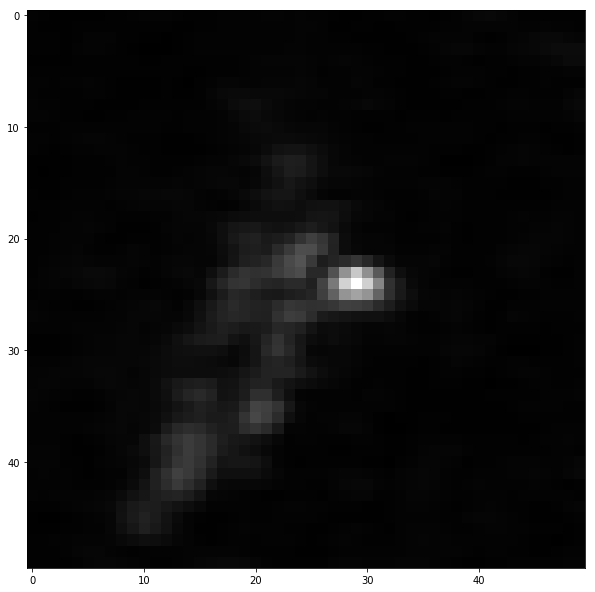

In [388]:
utils.display_random_good_prediction(preds[:125,],
                                    validation_generator.filenames[:125],
                                    valid_dir,
                                    0)

Number of samples found: 2
[  3.52535950e-04   3.98070551e-05   9.99607623e-01]
/home/ubuntu/data/sar/experiment_crops_20170815/validate/50x50//oil_and_gas_infrastructure/S1B_IW_GRDH_1SDV_20161020T055721_20161020T055746_002586_0045E3_97D0_terrain_correction_13.png


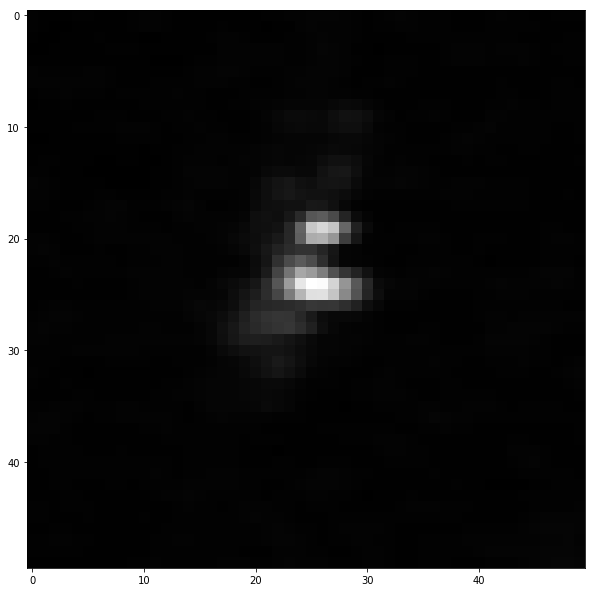

In [218]:
utils.display_random_bad_prediction(preds[:125,],
                                    validation_generator.filenames[:125],
                                    valid_dir,
                                    0)

Number of samples found: 1
[  3.77380550e-01   6.22614503e-01   4.97454675e-06]
/home/ubuntu/data/sar/experiment_crops_20170815/validate/50x50//oil_and_gas_infrastructure/S1A_IW_GRDH_1SDV_20170119T174954_20170119T175019_014904_018511_D7DE_terrain_correction_13.png


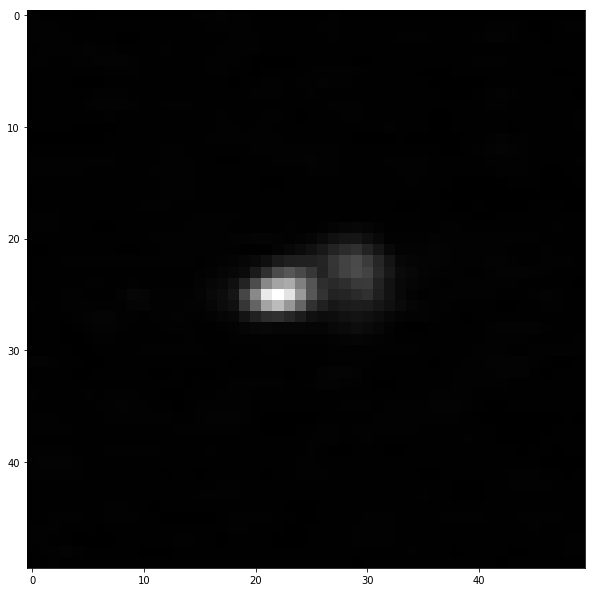

In [220]:
utils.display_random_uncertain_prediction(preds[:125,],
                                    validation_generator.filenames[:125],
                                    valid_dir,
                                    0,
                                    0.7,
                                    0.3)

REMARKS: Good predictions all appear consist of quite large blobs, bad predictions appear to consist of quite small blobs.

### Analysing Actual "other"

In [181]:
utils.kari_plot(preds[125:250], short_validation_filenames[125:250])

Number of samples found: 73
[  5.80793640e-05   9.99941945e-01   1.51560885e-21]
/home/ubuntu/data/sar/experiment_crops_20170815/validate/50x50//other/S1A_IW_GRDH_1SDV_20170420T174059_20170420T174124_016231_01AD67_81FE_subset4_36.png


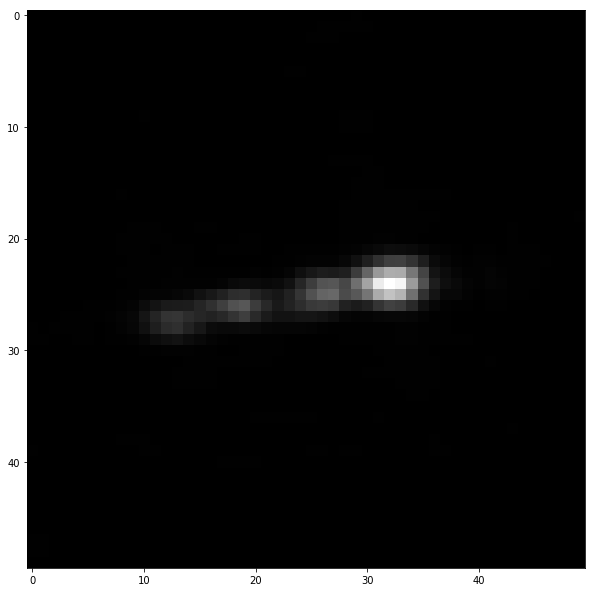

In [249]:
utils.display_random_good_prediction(preds[125:250,],
                                    validation_generator.filenames[125:250],
                                    valid_dir,
                                    1)

Number of samples found: 6
[  9.91299450e-01   8.68623517e-03   1.42565268e-05]
/home/ubuntu/data/sar/experiment_crops_20170815/validate/50x50//other/S1A_IW_GRDH_1SDV_20170607T174104_20170607T174129_016931_01C2D4_E8F6_subset9_6.png


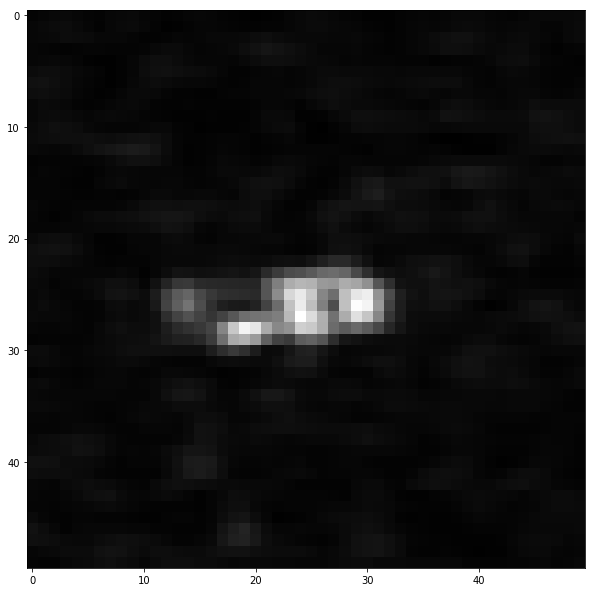

In [250]:
utils.display_random_bad_prediction(preds[125:250,],
                                    validation_generator.filenames[125:250],
                                    valid_dir,
                                    1)

Number of samples found: 9
[  5.56425750e-01   4.43574220e-01   1.93205913e-08]
/home/ubuntu/data/sar/experiment_crops_20170815/validate/50x50//other/S1A_IW_GRDH_1SDV_20170526T174103_20170526T174128_016756_01BD64_D7CD_subset8_35.png


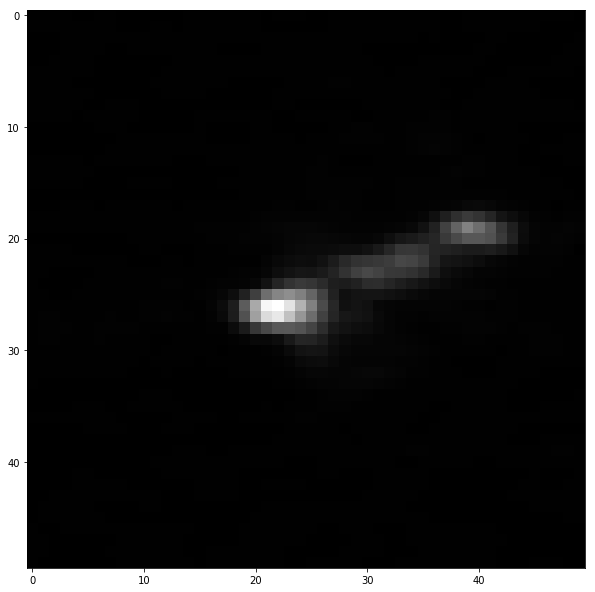

In [275]:
utils.display_random_uncertain_prediction(preds[125:250,],
                                    validation_generator.filenames[125:250],
                                    valid_dir,
                                    1,
                                    0.7,
                                    0.3)

REMARKS: Bad predictions all appear consist of quite large blobs (confused and `oil_and_gas_infrastructure`).

### Kari Plot "turbine"

In [93]:
utils.kari_plot(preds[250:], short_validation_filenames[250:])

Number of samples found: 217
[  4.81395887e-07   3.82126658e-04   9.99617338e-01]
/home/ubuntu/data/sar/experiment_crops_20170815/validate/50x50//turbine/S1A_IW_GRDH_1SDV_20170516T061401_20170516T061426_016603_01B8B1_0893_terrain_correction_281.png


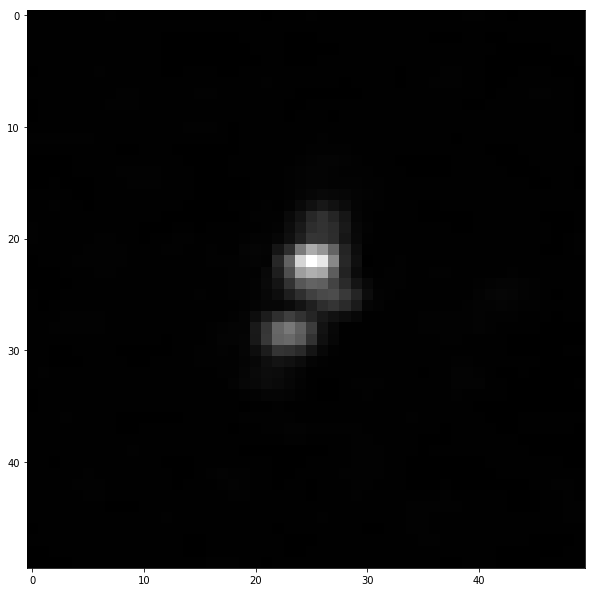

In [295]:
utils.display_random_good_prediction(preds[250:,],
                                    validation_generator.filenames[250:],
                                    valid_dir,
                                    2)

Number of samples found: 2
[  9.99994040e-01   5.93778623e-06   1.92734804e-11]
/home/ubuntu/data/sar/experiment_crops_20170815/validate/50x50//turbine/S1A_IW_GRDH_1SDV_20170509T173259_20170509T173324_016508_01B5C7_AD39_terrain_correction_69.png


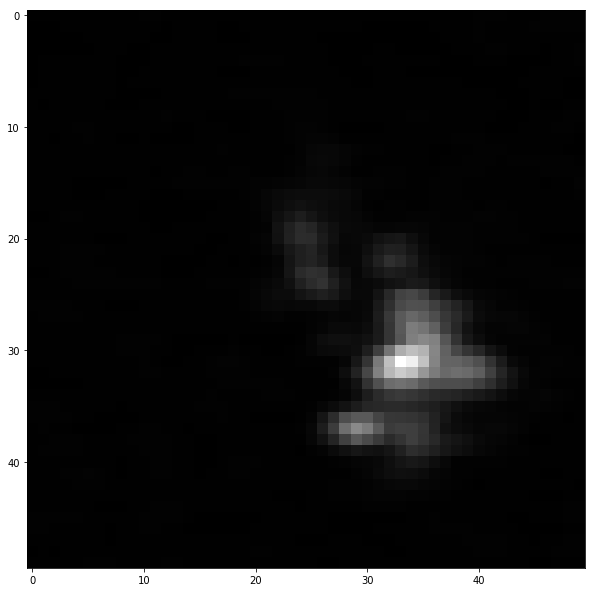

In [306]:
utils.display_random_bad_prediction(preds[250:,],
                                    validation_generator.filenames[250:],
                                    valid_dir,
                                    2)

Number of samples found: 4
[  3.69800475e-08   5.78109682e-01   4.21890229e-01]
/home/ubuntu/data/sar/experiment_crops_20170815/validate/50x50//turbine/S1B_IW_GRDH_1SDV_20170405T180534_20170405T180559_005029_008CB6_15F8_terrain_correction_197.png


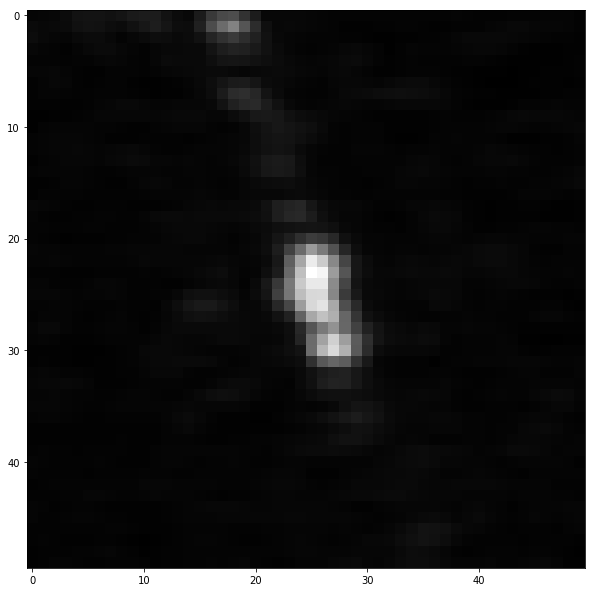

In [317]:
utils.display_random_uncertain_prediction(preds[250:,],
                                    validation_generator.filenames[250:],
                                    valid_dir,
                                    2,
                                    0.7,
                                    0.3)

REMARK: Nothing really noticable.

## changing model to deal with overfitting - batchnorm? 


In [347]:
classifier_input = Input(shape=input_shape)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(classifier_input)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization(axis=-1)(x)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Flatten()(x)
x = Dense(num_classes, activation='softmax')(x)

model_batchnorm = Model(outputs=x, inputs=classifier_input)
model_batchnorm.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [348]:
model_batchnorm.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 50, 50, 1)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 50, 50, 32)        320       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 25, 25, 64)        18496     
_________________________________________________________________
batch_normalization_6 (Batch (None, 25, 25, 64)        256       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 12, 12, 64)        36928     
__________

In [349]:
lr = 0.001
K.set_value(model_batchnorm.optimizer.lr, lr)
model_batchnorm.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=60)

Epoch 1/10
100/100 [==============================] - 15s - loss: 0.4586 - acc: 0.8255 - val_loss: 0.9739 - val_acc: 0.8567
Epoch 2/10
100/100 [==============================] - 15s - loss: 0.2229 - acc: 0.9090 - val_loss: 0.8172 - val_acc: 0.8900
Epoch 3/10
100/100 [==============================] - 15s - loss: 0.1628 - acc: 0.9410 - val_loss: 0.5413 - val_acc: 0.9033
Epoch 4/10
100/100 [==============================] - 15s - loss: 0.1298 - acc: 0.9545 - val_loss: 0.5226 - val_acc: 0.7417
Epoch 5/10
100/100 [==============================] - 15s - loss: 0.1009 - acc: 0.9600 - val_loss: 0.2858 - val_acc: 0.9050
Epoch 6/10
100/100 [==============================] - 15s - loss: 0.0738 - acc: 0.9735 - val_loss: 0.1920 - val_acc: 0.9433
Epoch 7/10
100/100 [==============================] - 15s - loss: 0.0584 - acc: 0.9780 - val_loss: 0.2017 - val_acc: 0.9500
Epoch 8/10
100/100 [==============================] - 15s - loss: 0.0576 - acc: 0.9775 - val_loss: 0.3083 - val_acc: 0.9383
Epoch 9/

In [350]:
lr = 0.001
K.set_value(model_batchnorm.optimizer.lr, lr)
model_batchnorm.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=60)

Epoch 1/5
100/100 [==============================] - 15s - loss: 0.0332 - acc: 0.9870 - val_loss: 0.3250 - val_acc: 0.9433
Epoch 2/5
100/100 [==============================] - 15s - loss: 0.0228 - acc: 0.9935 - val_loss: 0.4781 - val_acc: 0.9133
Epoch 3/5
100/100 [==============================] - 15s - loss: 0.0172 - acc: 0.9940 - val_loss: 0.4612 - val_acc: 0.9300
Epoch 4/5
100/100 [==============================] - 15s - loss: 0.0164 - acc: 0.9940 - val_loss: 0.3434 - val_acc: 0.9383
Epoch 5/5
100/100 [==============================] - 15s - loss: 0.0147 - acc: 0.9945 - val_loss: 0.3382 - val_acc: 0.9483


In [351]:
lr = 0.001
K.set_value(model_batchnorm.optimizer.lr, lr)
model_batchnorm.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=60)

Epoch 1/5
100/100 [==============================] - 15s - loss: 0.0095 - acc: 0.9955 - val_loss: 0.3582 - val_acc: 0.9567
Epoch 2/5
100/100 [==============================] - 15s - loss: 0.0168 - acc: 0.9950 - val_loss: 0.4174 - val_acc: 0.9350
Epoch 3/5
100/100 [==============================] - 15s - loss: 0.0097 - acc: 0.9975 - val_loss: 0.3230 - val_acc: 0.9517
Epoch 4/5
100/100 [==============================] - 15s - loss: 0.0044 - acc: 0.9985 - val_loss: 0.4570 - val_acc: 0.9333
Epoch 5/5
100/100 [==============================] - 15s - loss: 0.0048 - acc: 0.9985 - val_loss: 0.3270 - val_acc: 0.9517


In [352]:
lr = 0.0001
K.set_value(model_batchnorm.optimizer.lr, lr)
model_batchnorm.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=2,
        validation_data=validation_generator,
        validation_steps=60)

Epoch 1/2
100/100 [==============================] - 15s - loss: 1.6641e-04 - acc: 1.0000 - val_loss: 0.3662 - val_acc: 0.9483
Epoch 2/2
100/100 [==============================] - 15s - loss: 2.8684e-05 - acc: 1.0000 - val_loss: 0.3706 - val_acc: 0.9417


## move position of batchnorm? need to split the activation from the conv layer first

In [353]:
classifier_input = Input(shape=input_shape)

x = Conv2D(32, (3, 3), activation=None, padding='same')(classifier_input)
x = Activation('relu')(x)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation=None, padding='same')(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation=None, padding='same')(x)
x = Activation('relu')(x)
x = Flatten()(x)
x = Dense(num_classes, activation='softmax')(x)

model_split_activation = Model(outputs=x, inputs=classifier_input)
model_split_activation.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [354]:
lr = 0.001
K.set_value(model_split_activation.optimizer.lr, lr)
model_split_activation.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=60)

Epoch 1/5
100/100 [==============================] - 10s - loss: 0.5519 - acc: 0.7625 - val_loss: 0.4729 - val_acc: 0.8033
Epoch 2/5
100/100 [==============================] - 10s - loss: 0.3473 - acc: 0.8675 - val_loss: 0.3071 - val_acc: 0.8850
Epoch 3/5
100/100 [==============================] - 10s - loss: 0.2706 - acc: 0.8985 - val_loss: 0.3336 - val_acc: 0.8717
Epoch 4/5
100/100 [==============================] - 10s - loss: 0.2112 - acc: 0.9200 - val_loss: 0.2717 - val_acc: 0.9333
Epoch 5/5
100/100 [==============================] - 10s - loss: 0.1746 - acc: 0.9340 - val_loss: 0.3535 - val_acc: 0.8967


In [355]:
lr = 0.01
K.set_value(model_split_activation.optimizer.lr, lr)
model_split_activation.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=60)

Epoch 1/5
100/100 [==============================] - 10s - loss: 0.7682 - acc: 0.7480 - val_loss: 0.6537 - val_acc: 0.8233
Epoch 2/5
100/100 [==============================] - 10s - loss: 0.4856 - acc: 0.8265 - val_loss: 0.2979 - val_acc: 0.8983
Epoch 3/5
100/100 [==============================] - 10s - loss: 0.4528 - acc: 0.8530 - val_loss: 0.4108 - val_acc: 0.8267
Epoch 4/5
100/100 [==============================] - 10s - loss: 0.3601 - acc: 0.8805 - val_loss: 0.2780 - val_acc: 0.9333
Epoch 5/5
100/100 [==============================] - 10s - loss: 0.2940 - acc: 0.9000 - val_loss: 0.4431 - val_acc: 0.8533


## add the batchnorm before the activation. (need dense layers mid way? )

In [356]:
x = Conv2D(32, (3, 3), activation=None, padding='same')(classifier_input)
x = BatchNormalization(axis=-1)(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation=None, padding='same')(x)
x = BatchNormalization(axis=-1)(x)
x = Activation('relu')(x)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation=None, padding='same')(x)
x = BatchNormalization(axis=-1)(x)
x = Activation('relu')(x)
x = Flatten()(x)
x = Dense(num_classes, activation='softmax')(x)

model_split_activation_batchnorm = Model(outputs=x, inputs=classifier_input)
model_split_activation_batchnorm.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [357]:
model_split_activation_batchnorm.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 50, 50, 1)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 50, 50, 32)        320       
_________________________________________________________________
batch_normalization_7 (Batch (None, 50, 50, 32)        128       
_________________________________________________________________
activation_10 (Activation)   (None, 50, 50, 32)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 25, 25, 64)        18496     
_________________________________________________________________
batch_normalization_8 (Batch (None, 25, 25, 64)        256       
__________

In [359]:
lr = 0.01
K.set_value(model_split_activation_batchnorm.optimizer.lr, lr)
model_split_activation_batchnorm.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=2,
        validation_data=validation_generator,
        validation_steps=60)

Epoch 1/2
100/100 [==============================] - 25s - loss: 12.1394 - acc: 0.2415 - val_loss: 10.8797 - val_acc: 0.3250
Epoch 2/2
100/100 [==============================] - 24s - loss: 10.1874 - acc: 0.3605 - val_loss: 5.0335 - val_acc: 0.6300


In [360]:
lr = 0.01
K.set_value(model_split_activation_batchnorm.optimizer.lr, lr)
model_split_activation_batchnorm.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=60)

Epoch 1/10
100/100 [==============================] - 25s - loss: 4.5324 - acc: 0.6940 - val_loss: 6.3271 - val_acc: 0.5350
Epoch 2/10
100/100 [==============================] - 24s - loss: 3.1792 - acc: 0.7740 - val_loss: 12.7602 - val_acc: 0.2083
Epoch 3/10
100/100 [==============================] - 25s - loss: 2.2206 - acc: 0.8420 - val_loss: 2.3583 - val_acc: 0.8233
Epoch 4/10
100/100 [==============================] - 25s - loss: 2.0138 - acc: 0.8570 - val_loss: 10.5671 - val_acc: 0.3367
Epoch 5/10
100/100 [==============================] - 25s - loss: 1.6313 - acc: 0.8810 - val_loss: 2.2329 - val_acc: 0.8400
Epoch 6/10
100/100 [==============================] - 25s - loss: 1.7351 - acc: 0.8755 - val_loss: 6.1212 - val_acc: 0.5867
Epoch 7/10
100/100 [==============================] - 25s - loss: 1.3994 - acc: 0.8945 - val_loss: 3.0176 - val_acc: 0.7750
Epoch 8/10
100/100 [==============================] - 25s - loss: 1.2618 - acc: 0.9030 - val_loss: 4.1598 - val_acc: 0.6950
Epoch 

In [361]:
lr = 0.0001
K.set_value(model_split_activation_batchnorm.optimizer.lr, lr)
model_split_activation_batchnorm.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=2,
        validation_data=validation_generator,
        validation_steps=60)

Epoch 1/2
100/100 [==============================] - 25s - loss: 1.7862 - acc: 0.8530 - val_loss: 1.4453 - val_acc: 0.8900
Epoch 2/2
100/100 [==============================] - 25s - loss: 1.3221 - acc: 0.8860 - val_loss: 1.1826 - val_acc: 0.9150


In [362]:
lr = 0.0001
K.set_value(model_split_activation_batchnorm.optimizer.lr, lr)
model_split_activation_batchnorm.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=2,
        validation_data=validation_generator,
        validation_steps=60)

Epoch 1/2
100/100 [==============================] - 25s - loss: 1.0411 - acc: 0.9090 - val_loss: 1.4528 - val_acc: 0.8950
Epoch 2/2
100/100 [==============================] - 25s - loss: 0.8925 - acc: 0.9280 - val_loss: 1.3030 - val_acc: 0.9117


## validation accuracy is jumping around so we will try increasing the batch size

In [363]:
train_datagen2 = ImageDataGenerator(rescale=1./255)

test_datagen2 = ImageDataGenerator(rescale=1./255)

train_generator2 = train_datagen2.flow_from_directory(
        train_dir,
        target_size=(50, 50),
        batch_size=40,
        class_mode='categorical', 
        color_mode='grayscale')

validation_generator2 = test_datagen2.flow_from_directory(
        valid_dir, 
        target_size=(50, 50),
        shuffle=False,
        batch_size=20,
        class_mode='categorical',
        color_mode='grayscale')

Found 2000 images belonging to 3 classes.
Found 500 images belonging to 3 classes.


In [364]:
lr = 0.001
K.set_value(model_split_activation_batchnorm.optimizer.lr, lr)
model_split_activation_batchnorm.fit_generator(
        train_generator2,
        steps_per_epoch=100,
        epochs=2,
        validation_data=validation_generator2,
        validation_steps=60)

Epoch 1/2
100/100 [==============================] - 48s - loss: 0.6533 - acc: 0.9428 - val_loss: 1.0079 - val_acc: 0.9217
Epoch 2/2
100/100 [==============================] - 48s - loss: 0.5232 - acc: 0.9535 - val_loss: 0.9946 - val_acc: 0.9217


In [365]:
lr = 0.0001
K.set_value(model_split_activation_batchnorm.optimizer.lr, lr)
model_split_activation_batchnorm.fit_generator(
        train_generator2,
        steps_per_epoch=100,
        epochs=2,
        validation_data=validation_generator2,
        validation_steps=60)

Epoch 1/2
100/100 [==============================] - 48s - loss: 0.4605 - acc: 0.9605 - val_loss: 0.8406 - val_acc: 0.9333
Epoch 2/2
100/100 [==============================] - 48s - loss: 0.4367 - acc: 0.9623 - val_loss: 0.8961 - val_acc: 0.9308


In [366]:
lr = 0.0001
K.set_value(model_split_activation_batchnorm.optimizer.lr, lr)
model_split_activation_batchnorm.fit_generator(
        train_generator2,
        steps_per_epoch=100,
        epochs=2,
        validation_data=validation_generator2,
        validation_steps=60)

Epoch 1/2
100/100 [==============================] - 48s - loss: 0.4419 - acc: 0.9618 - val_loss: 0.9873 - val_acc: 0.9208
Epoch 2/2
100/100 [==============================] - 48s - loss: 0.4239 - acc: 0.9633 - val_loss: 0.9832 - val_acc: 0.9167


## changing model to include dropout 

In [367]:
classifier_input = Input(shape=input_shape)

p=0.6

x = Conv2D(32, (3, 3), activation=None, padding='same')(classifier_input)
x = BatchNormalization(axis=-1)(x)
x = Activation('relu')(x)
x = Dropout(p/4)(x)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation=None, padding='same')(x)
x = BatchNormalization(axis=-1)(x)
x = Activation('relu')(x)
x = Dropout(p/2)(x)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation=None, padding='same')(x)
x = BatchNormalization(axis=-1)(x)
x = Activation('relu')(x)
x = Dropout(p)(x)
x = Flatten()(x)
x = Dense(num_classes, activation='softmax')(x)

model_batchnorm_dropout = Model(outputs=x, inputs=classifier_input)
model_batchnorm_dropout.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [368]:
lr = 0.001
K.set_value(model_batchnorm_dropout.optimizer.lr, lr)
model_batchnorm_dropout.fit_generator(
        train_generator2,
        steps_per_epoch=100,
        epochs=5,
        validation_data=validation_generator2,
        validation_steps=60)

Epoch 1/5
100/100 [==============================] - 52s - loss: 0.6792 - acc: 0.7847 - val_loss: 1.3920 - val_acc: 0.2917
Epoch 2/5
100/100 [==============================] - 52s - loss: 0.3382 - acc: 0.8880 - val_loss: 2.1706 - val_acc: 0.2083
Epoch 3/5
100/100 [==============================] - 52s - loss: 0.2286 - acc: 0.9253 - val_loss: 0.6038 - val_acc: 0.8050
Epoch 4/5
100/100 [==============================] - 52s - loss: 0.1899 - acc: 0.9345 - val_loss: 0.6229 - val_acc: 0.7550
Epoch 5/5
100/100 [==============================] - 52s - loss: 0.1309 - acc: 0.9568 - val_loss: 0.7803 - val_acc: 0.7108


In [369]:
lr = 0.001
K.set_value(model_batchnorm_dropout.optimizer.lr, lr)
model_batchnorm_dropout.fit_generator(
        train_generator2,
        steps_per_epoch=100,
        epochs=3,
        validation_data=validation_generator2,
        validation_steps=60)

Epoch 1/3
100/100 [==============================] - 52s - loss: 0.1304 - acc: 0.9568 - val_loss: 0.5760 - val_acc: 0.8208
Epoch 2/3
100/100 [==============================] - 52s - loss: 0.0997 - acc: 0.9645 - val_loss: 0.2001 - val_acc: 0.9433
Epoch 3/3
100/100 [==============================] - 53s - loss: 0.0904 - acc: 0.9688 - val_loss: 0.3580 - val_acc: 0.8792


In [370]:
lr = 0.0001
K.set_value(model_batchnorm_dropout.optimizer.lr, lr)
model_batchnorm_dropout.fit_generator(
        train_generator2,
        steps_per_epoch=100,
        epochs=2,
        validation_data=validation_generator2,
        validation_steps=60)

Epoch 1/2
100/100 [==============================] - 52s - loss: 0.0509 - acc: 0.9813 - val_loss: 0.2818 - val_acc: 0.9200
Epoch 2/2
100/100 [==============================] - 52s - loss: 0.0317 - acc: 0.9875 - val_loss: 0.2919 - val_acc: 0.9167


## Finally data augmentation (on pretrained best model = model_batchnorm_dropout)

In [389]:
train_datagen_aug = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=90,
        horizontal_flip=True,
        vertical_flip=True)

test_datagen_aug = ImageDataGenerator(rescale=1./255)

train_generator_aug = train_datagen_aug.flow_from_directory(
        train_dir,
        target_size=(50, 50),
        batch_size=40,
        class_mode='categorical', 
        color_mode='grayscale')

validation_generator_aug = test_datagen_aug.flow_from_directory(
        valid_dir, 
        target_size=(50, 50),
        shuffle=False,
        batch_size=20,
        class_mode='categorical',
        color_mode='grayscale')

Found 2000 images belonging to 3 classes.
Found 500 images belonging to 3 classes.


In [390]:
lr = 0.0001
K.set_value(model_batchnorm_dropout.optimizer.lr, lr)
model_batchnorm_dropout.fit_generator(
        train_generator2,
        steps_per_epoch=100,
        epochs=5,
        validation_data=validation_generator2,
        validation_steps=60)

Epoch 1/5
100/100 [==============================] - 52s - loss: 0.0336 - acc: 0.9895 - val_loss: 0.3153 - val_acc: 0.9192
Epoch 2/5
100/100 [==============================] - 52s - loss: 0.0305 - acc: 0.9898 - val_loss: 0.2765 - val_acc: 0.9325
Epoch 3/5
100/100 [==============================] - 52s - loss: 0.0284 - acc: 0.9905 - val_loss: 0.2912 - val_acc: 0.9325
Epoch 4/5
100/100 [==============================] - 52s - loss: 0.0290 - acc: 0.9903 - val_loss: 0.3612 - val_acc: 0.9008
Epoch 5/5
100/100 [==============================] - 52s - loss: 0.0262 - acc: 0.9920 - val_loss: 0.2970 - val_acc: 0.9217


In [392]:
lr = 0.001
K.set_value(model_batchnorm_dropout.optimizer.lr, lr)
model_batchnorm_dropout.fit_generator(
        train_generator2,
        steps_per_epoch=100,
        epochs=2,
        validation_data=validation_generator2,
        validation_steps=60)

Epoch 1/2
100/100 [==============================] - 52s - loss: 0.0605 - acc: 0.9765 - val_loss: 0.2101 - val_acc: 0.9408
Epoch 2/2
100/100 [==============================] - 53s - loss: 0.0606 - acc: 0.9798 - val_loss: 0.3925 - val_acc: 0.8975


In [393]:
lr = 0.0001
K.set_value(model_batchnorm_dropout.optimizer.lr, lr)
model_batchnorm_dropout.fit_generator(
        train_generator2,
        steps_per_epoch=100,
        epochs=2,
        validation_data=validation_generator2,
        validation_steps=60)

Epoch 1/2
100/100 [==============================] - 53s - loss: 0.0286 - acc: 0.9898 - val_loss: 0.2288 - val_acc: 0.9467
Epoch 2/2
100/100 [==============================] - 53s - loss: 0.0223 - acc: 0.9925 - val_loss: 0.3419 - val_acc: 0.9008


## More Dense Layers

In [12]:
# remove me 

train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(50, 50),
        batch_size=20,
        class_mode='categorical', 
        color_mode='grayscale')

validation_generator = test_datagen.flow_from_directory(
        valid_dir, 
        target_size=(50, 50),
        shuffle=False,
        batch_size=10,
        class_mode='categorical',
        color_mode='grayscale')

Found 2000 images belonging to 3 classes.
Found 500 images belonging to 3 classes.


In [13]:
classifier_input = Input(shape=input_shape)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(classifier_input)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Flatten()(x)
x = Dense(64)(x)
x = Dense(32)(x)
x = Dense(num_classes, activation='softmax')(x)

model_dense = Model(outputs=x, inputs=classifier_input)
model_dense.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

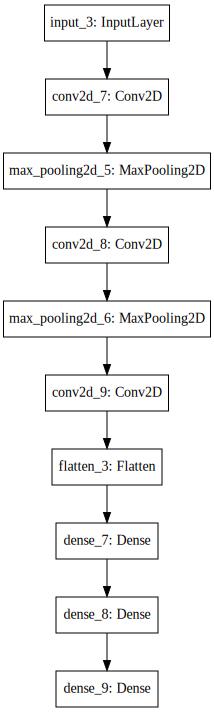

In [16]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model_dense).create(prog='dot', format='svg'))

In [15]:
lr = 0.001
K.set_value(model_dense.optimizer.lr, lr)
model_dense.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=60)

Epoch 1/10
100/100 [==============================] - 11s - loss: 0.1846 - acc: 0.9300 - val_loss: 0.2387 - val_acc: 0.9217
Epoch 2/10
100/100 [==============================] - 12s - loss: 0.1570 - acc: 0.9415 - val_loss: 0.2586 - val_acc: 0.9383
Epoch 3/10
100/100 [==============================] - 11s - loss: 0.1375 - acc: 0.9485 - val_loss: 0.2489 - val_acc: 0.9383
Epoch 4/10
100/100 [==============================] - 12s - loss: 0.1059 - acc: 0.9615 - val_loss: 0.3126 - val_acc: 0.9283
Epoch 5/10
100/100 [==============================] - 11s - loss: 0.0986 - acc: 0.9645 - val_loss: 0.2352 - val_acc: 0.9400
Epoch 6/10
100/100 [==============================] - 11s - loss: 0.0801 - acc: 0.9730 - val_loss: 0.3087 - val_acc: 0.9267
Epoch 7/10
100/100 [==============================] - 11s - loss: 0.0749 - acc: 0.9760 - val_loss: 0.3716 - val_acc: 0.9167
Epoch 8/10
100/100 [==============================] - 12s - loss: 0.0787 - acc: 0.9750 - val_loss: 0.3312 - val_acc: 0.9283
Epoch 9/